In [226]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
%matplotlib inline
import seaborn as sb

In [227]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [228]:
y_train=df_train.Survived

In [229]:
df_train.drop('Survived', axis=1, inplace=True)

In [230]:
df_train.columns==df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

In [231]:
df_train['is_test']=0

In [232]:
df_test['is_test']=1

In [233]:
df1=pd.concat([df_test,df_train])

In [234]:
df1['isMale']=df1.Sex.replace({'male':1,'female':0})

In [235]:
df1['is_Family']=((df1['SibSp']+df1['Parch'])>0).astype(int)

In [236]:
df1['is_Alone']=(df1['is_Family']==0).astype(int)

In [237]:
df1['is_Child']=(df1.Age<17).astype(int)

In [238]:
df1_1=pd.get_dummies(df1,columns=['Pclass'])

In [239]:
df1_1.drop(['PassengerId', 'Name','Cabin', 'Ticket', 'Sex', 'SibSp','Parch', 'Pclass_3', 'Embarked'], inplace=True, axis=1)

In [240]:
df1_1.Fare.fillna(df1_1.Fare.mean(), inplace=True)

In [241]:
df1_1.Age.fillna(df1_1.Age.mean(), inplace=True)

In [242]:
x_train=df1_1[df1_1.is_test==0].drop('is_test', axis=1)
x_test=df1_1[df1_1.is_test==1].drop('is_test', axis=1)

In [243]:
columns=x_train.columns

In [244]:
from sklearn.preprocessing import StandardScaler

In [245]:
scaler=StandardScaler()

In [246]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [247]:
x_train_sc=scaler.transform(x_train)
x_train_sc=pd.DataFrame(x_train_sc, columns=columns)

In [248]:
x_train_sc.head()

,Age,Fare,isMale,is_Family,is_Alone,is_Child,Pclass_1,Pclass_2
0,-0.595254,-0.502445,0.737695,1.231645,-1.231645,-0.355559,-0.565685,-0.510152
1,0.635996,0.786845,-1.355574,1.231645,-1.231645,-0.355559,1.767767,-0.510152
2,-0.287441,-0.488854,-1.355574,-0.811922,0.811922,-0.355559,-0.565685,-0.510152
3,0.405137,0.420730,-1.355574,1.231645,-1.231645,-0.355559,1.767767,-0.510152
4,0.405137,-0.486337,0.737695,-0.811922,0.811922,-0.355559,-0.565685,-0.510152


In [249]:
x_test_sc=scaler.transform(x_test)

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
x_train_fin, x_cv, y_train_fin, y_cv=train_test_split(x_train_sc, y_train, test_size=0.2)

In [269]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble.RandomForestClassifier 

SyntaxError: invalid syntax (<ipython-input-269-2224e06d6af8>, line 2)

In [253]:
depth=np.arange(1,10)
grid={'max_depth':depth}
gridsearch=GridSearchCV(DecisionTreeClassifier(),grid,scoring='accuracy', cv=5)

In [254]:
gridsearch.fit(x_train_fin, y_train_fin)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [255]:
sorted(gridsearch.grid_scores_, key=lambda x: -x.mean_validation_score)

C:\Users\mrasskazov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.82303, std: 0.02751, params: {'max_depth': 5},
 mean: 0.81461, std: 0.02380, params: {'max_depth': 4},
 mean: 0.80758, std: 0.02022, params: {'max_depth': 7},
 mean: 0.80197, std: 0.02416, params: {'max_depth': 6},
 mean: 0.80056, std: 0.02544, params: {'max_depth': 8},
 mean: 0.79916, std: 0.01949, params: {'max_depth': 9},
 mean: 0.78511, std: 0.02929, params: {'max_depth': 2},
 mean: 0.78230, std: 0.02950, params: {'max_depth': 1},
 mean: 0.76966, std: 0.02090, params: {'max_depth': 3}]

C:\Users\mrasskazov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


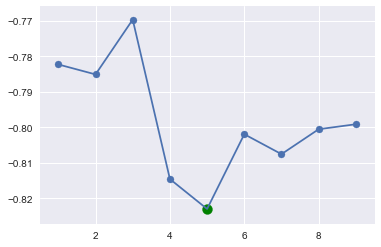

In [256]:
scores=[-x.mean_validation_score for x in gridsearch.grid_scores_]
pyplot.plot(depth, scores)
pyplot.scatter(depth, scores)
best_point=np.argmin(scores)
pyplot.scatter(depth[best_point], scores[best_point],c='g', s=100);

In [257]:
from sklearn.metrics import accuracy_score

In [258]:
dt=DecisionTreeClassifier(max_depth=5)

In [259]:
dt.fit(x_train_fin, y_train_fin)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [260]:
y_cv_pred=dt.predict(x_cv)

In [261]:
accuracy_score(y_cv, y_cv_pred)

0.83240223463687146

In [262]:
dt.fit(x_train_sc, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [263]:
prediction=dt.predict(x_test_sc)

In [264]:
submission='PassengerId,Survived\n'
submission+="\n".join(['{},{}'.format(pid,prediction) for pid, prediction in zip(df_test.PassengerId,prediction)])

In [265]:
with open ('submission.txt', 'w') as file:
    file.write(submission)

In [266]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [267]:
from sklearn.preprocessing import LabelEncoder as le

In [268]:
get_tree_dot_view(dt, list(x_train_sc.columns))

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="isMale <= -0.3089\ngini = 0.473\nsamples = 891\nvalue = [549, 342]", fillcolor="#e5813960"] ;
1 [label="Pclass_1 <= 0.601\ngini = 0.3828\nsamples = 314\nvalue = [81, 233]", fillcolor="#399de5a6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Pclass_2 <= 0.725\ngini = 0.4577\nsamples = 220\nvalue = [78, 142]", fillcolor="#399de573"] ;
1 -> 2 ;
3 [label="Fare <= -0.1783\ngini = 0.5\nsamples = 144\nvalue = [72, 72]", fillcolor="#e5813900"] ;
2 -> 3 ;
4 [label="Age <= 0.5206\ngini = 0.4839\nsamples = 117\nvalue = [48, 69]", fillcolor="#399de54e"] ;
3 -> 4 ;
5 [label="gini = 0.4721\nsamples = 110\nvalue = [42, 68]", fillcolor="#399de561"] ;
4 -> 5 ;
6 [label="gini = 0.2449\nsamples = 7\nvalue = [6, 1]", fillcolor="#e58139d4"] ;
4 -> 6 ;
7 [label="Age <= -1.865\ngini = 0.1975\nsamples = 27\nvalue = [24, 3]", fillcolor="#e58139df"] ;
3 -> 7 ;
8 [label="gini = 0.4444\nsamples = 3\nvalue = [2,